# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_excel('RP_arrival_all.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               1748 non-null   float64
 1   Standoff distance  1748 non-null   float64
 2   Angle              1748 non-null   int64  
 3   Arrival time       1748 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 54.8 KB


In [3]:
dataset.head()

,Mass,Standoff distance,Angle,Arrival time
0,0.5,5.0,0,10.055926
1,0.5,5.0,15,10.536600
2,0.5,5.0,30,12.221524
3,0.5,5.0,45,15.898340
4,2.5,5.0,0,7.722725


In [4]:
y = dataset['Arrival time']
X = dataset.drop(['Arrival time'], axis=1)
print(X.shape, y.shape)

(1748, 3) (1748,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

In [8]:
ann = tf.keras.models.Sequential()

In [9]:
ann.add(tf.keras.layers.Dense(units=20,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=15,
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=10,
                              activation='leaky_relu'))

In [10]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 566
Trainable params: 566
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [12]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [13]:
# protects from unnecessary further training of the model
#if a particular metric does not continue to improve over a number of n epochs.
#In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [14]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
41/41 [==============================] - 1s 11ms/step - loss: 373.5009 - mae: 12.9252 - val_loss: 39.5339 - val_mae: 4.8156
Epoch 2/500
41/41 [==============================] - 0s 4ms/step - loss: 25.5853 - mae: 3.4389 - val_loss: 18.6152 - val_mae: 3.0158
Epoch 3/500
41/41 [==============================] - 0s 4ms/step - loss: 19.5703 - mae: 2.9363 - val_loss: 16.2278 - val_mae: 2.6720
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 16.3385 - mae: 2.5301 - val_loss: 16.4297 - val_mae: 2.7055
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 14.8112 - mae: 2.4505 - val_loss: 12.5842 - val_mae: 2.1835
Epoch 6/500
41/41 [==============================] - 0s 4ms/step - loss: 13.0551 - mae: 2.2533 - val_loss: 12.5288 - val_mae: 2.3100
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 11.2055 - mae: 2.0971 - val_loss: 10.4511 - val_mae: 1.9912
Epoch 8/500
41/41 [==============================] - 0s 4ms/step -

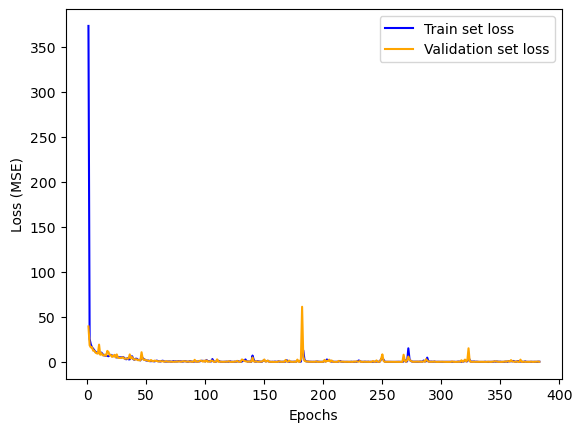

In [29]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Arrival_ANN4_2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

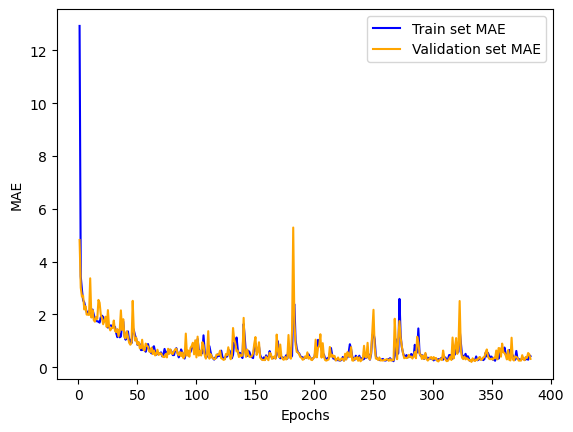

In [16]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Arrival_ANN4_3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [17]:
ann.save('Arrival_ANN4')

INFO:tensorflow:Assets written to: Arrival_ANN4\assets


# Part 4 - Make predictions

9/9 [==============================] - 0s 2ms/step


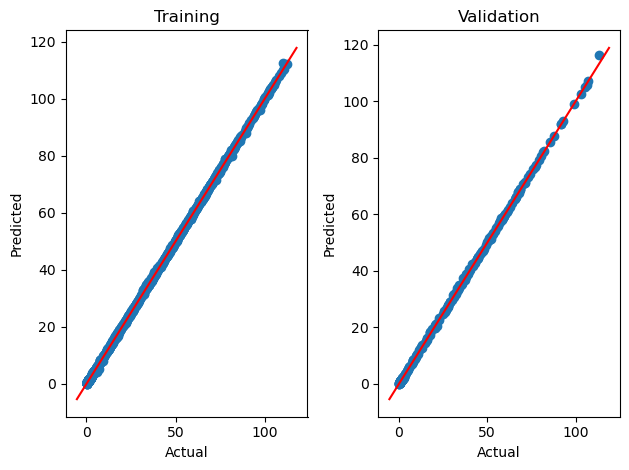

In [18]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Arrival_ANN4_1.png', dpi = 300, bbox_inches = 'tight')
# show the plot
plt.show()

In [9]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

9/9 [==============================] - 0s 4ms/step
[[ 29.39  29.33]
 [  1.67   1.92]
 [ 42.28  42.09]
 [ 60.71  60.62]
 [  0.65   0.57]
 [  0.45   0.46]
 [  1.6    1.61]
 [ 48.39  48.43]
 [ 49.94  50.24]
 [  2.36   2.58]
 [ 46.9   46.88]
 [ 82.4   82.55]
 [ 50.92  50.34]
 [ 28.91  28.87]
 [  0.35   0.36]
 [ 20.22  20.51]
 [ 75.64  75.31]
 [ 13.53  13.49]
 [  0.36   0.37]
 [  2.65   2.85]
 [ 78.01  77.96]
 [  1.24   1.28]
 [  1.38   1.52]
 [  1.71   1.98]
 [  0.54   0.53]
 [ 37.55  37.5 ]
 [ 15.41  15.07]
 [  9.29   9.68]
 [  4.36   4.3 ]
 [ 54.19  54.62]
 [ 11.51  11.45]
 [ 23.52  23.46]
 [ 54.49  53.82]
 [  1.28   1.21]
 [ 81.99  82.17]
 [101.93 102.17]
 [  0.56   0.59]
 [ 71.92  73.4 ]
 [ 56.7   55.86]
 [ 28.12  28.2 ]
 [ 37.46  38.44]
 [ 30.53  30.81]
 [ 70.27  70.13]
 [ 67.73  67.58]
 [  8.87   8.84]
 [ 26.81  26.93]
 [ 81.98  81.93]
 [  1.25   1.16]
 [  1.38   1.14]
 [ 52.02  51.87]
 [ 80.88  80.8 ]
 [ 72.89  72.75]
 [  0.26   0.36]
 [ 42.17  42.1 ]
 [ 17.38  17.35]
 [ 97.72  97.8

Text(0, 0.5, 'Predicted data')

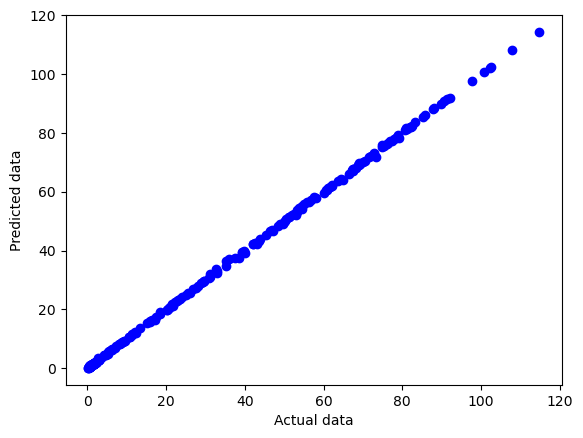

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,0.085],[0,0.085], color = "red")
#plt.axis ([0,0.085,0,0.085])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

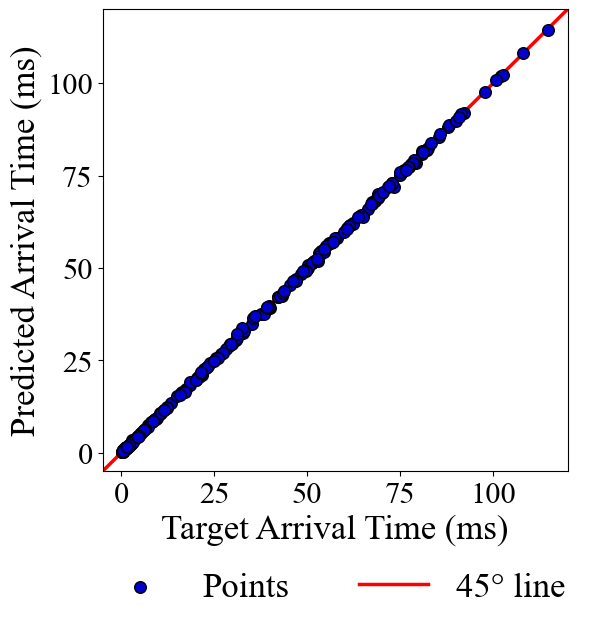

In [17]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 25

b_l = -5
u_l = 120

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Arrival Time (ms)')
plt.xlabel('Target Arrival Time (ms)')
plt.xticks([0, 25, 50, 75, 100],fontsize = 22)
plt.yticks([0, 25, 50, 75, 100],fontsize = 22)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 25)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')

plt.savefig('Arrival_ANN4.png', dpi = 300, bbox_inches = 'tight')

In [22]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

39/39 [==============================] - 0s 1ms/step
0.17489087860688324
0.21107572347783138


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9998883995227517


In [24]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.999912358930988


In [25]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 89.35%
Within 20% margin 96.20%
Out of 20% margin 3.80%


In [26]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.999887106853131


In [27]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.32828067041773773

In [28]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.21107572347783138

In [8]:
from keras.models import load_model
ann = load_model('Arrival_ANN4')

## SHAP

In [10]:
import shap
explainer = shap.KernelExplainer(ann.predict, X_train)
shap_values = explainer.shap_values(X_train)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


39/39 [==============================] - 0s 2ms/step


Using 1223 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1223 [00:00<?, ?it/s]

230/230 [==============================] - 0s 1ms/step


In [11]:
explainer2 = shap.Explainer(ann.predict, X_train)
shap_values2 = explainer2(X_train)

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 19/1223 [00:00<?, ?it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 21/1223 [00:10<02:35,  7.72it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 22/1223 [00:10<03:39,  5.48it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 23/1223 [00:11<04:13,  4.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 24/1223 [00:11<04:43,  4.22it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   2%|▏         | 25/1223 [00:11<04:59,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 26/1223 [00:11<05:02,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 27/1223 [00:12<05:14,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 28/1223 [00:12<05:11,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 29/1223 [00:12<05:09,  3.86it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   2%|▏         | 30/1223 [00:12<05:14,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 31/1223 [00:13<05:13,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 32/1223 [00:13<05:11,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 33/1223 [00:13<05:14,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 34/1223 [00:13<05:09,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 35/1223 [00:14<05:06,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 36/1223 [00:14<05:08,  3.85it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   3%|▎         | 37/1223 [00:14<05:09,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 38/1223 [00:14<05:06,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 39/1223 [00:15<05:07,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 40/1223 [00:15<05:06,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   3%|▎         | 41/1223 [00:15<05:05,  3.87it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   3%|▎         | 42/1223 [00:16<05:15,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▎         | 43/1223 [00:16<05:12,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▎         | 44/1223 [00:16<05:13,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▎         | 45/1223 [00:16<05:07,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 46/1223 [00:17<05:06,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 47/1223 [00:17<05:05,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 48/1223 [00:17<05:06,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 49/1223 [00:17<05:05,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 50/1223 [00:18<05:04,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 51/1223 [00:18<05:01,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 52/1223 [00:18<05:11,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 53/1223 [00:18<05:13,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 54/1223 [00:19<05:09,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 55/1223 [00:19<05:06,  3.81it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   5%|▍         | 56/1223 [00:19<05:03,  3.85it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   5%|▍         | 57/1223 [00:19<05:04,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▍         | 58/1223 [00:20<05:01,  3.87it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   5%|▍         | 59/1223 [00:20<05:09,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▍         | 60/1223 [00:20<05:08,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▍         | 61/1223 [00:21<05:06,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▌         | 62/1223 [00:21<05:00,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▌         | 63/1223 [00:21<04:57,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▌         | 64/1223 [00:21<04:55,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▌         | 65/1223 [00:22<04:55,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▌         | 66/1223 [00:22<04:55,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   5%|▌         | 67/1223 [00:22<04:57,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 68/1223 [00:22<04:54,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 69/1223 [00:23<04:51,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 70/1223 [00:23<04:51,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 71/1223 [00:23<04:48,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 72/1223 [00:23<04:59,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 73/1223 [00:24<05:02,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 74/1223 [00:24<04:58,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 75/1223 [00:24<04:54,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▌         | 76/1223 [00:24<04:51,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▋         | 77/1223 [00:25<04:47,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▋         | 78/1223 [00:25<04:53,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   6%|▋         | 79/1223 [00:25<04:53,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   7%|▋         | 80/1223 [00:25<04:52,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   7%|▋         | 81/1223 [00:26<04:56,  3.85it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   7%|▋         | 82/1223 [00:26<04:54,  3.88it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   7%|▋         | 83/1223 [00:26<04:55,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   7%|▋         | 84/1223 [00:26<05:06,  3.72it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   7%|▋         | 85/1223 [00:27<05:03,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   7%|▋         | 86/1223 [00:27<04:57,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   7%|▋         | 87/1223 [00:27<04:57,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   7%|▋         | 88/1223 [00:27<04:54,  3.85it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   7%|▋         | 89/1223 [00:28<04:50,  3.91it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:   7%|▋         | 90/1223 [00:28<04:53,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   7%|▋         | 91/1223 [00:28<04:51,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 92/1223 [00:28<04:49,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 93/1223 [00:29<04:48,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 94/1223 [00:29<04:46,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 95/1223 [00:29<04:47,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 96/1223 [00:29<04:43,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 97/1223 [00:30<04:39,  4.03it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 98/1223 [00:30<04:41,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 99/1223 [00:30<04:50,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 100/1223 [00:31<04:53,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 101/1223 [00:31<04:52,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 102/1223 [00:31<04:47,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   8%|▊         | 103/1223 [00:31<04:47,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▊         | 104/1223 [00:32<04:55,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▊         | 105/1223 [00:32<07:10,  2.60it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▊         | 106/1223 [00:32<06:24,  2.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▊         | 107/1223 [00:33<05:52,  3.16it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 108/1223 [00:33<05:40,  3.27it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 109/1223 [00:33<05:27,  3.40it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 110/1223 [00:34<05:19,  3.48it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 111/1223 [00:34<05:08,  3.60it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 112/1223 [00:34<05:04,  3.65it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 113/1223 [00:34<04:59,  3.71it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 114/1223 [00:35<04:53,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 115/1223 [00:35<04:50,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 116/1223 [00:35<04:46,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|▉         | 117/1223 [00:35<04:45,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|▉         | 118/1223 [00:36<04:57,  3.72it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|▉         | 119/1223 [00:36<04:53,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|▉         | 120/1223 [00:36<04:51,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|▉         | 121/1223 [00:36<04:50,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|▉         | 122/1223 [00:37<04:48,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|█         | 123/1223 [00:37<04:46,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|█         | 124/1223 [00:37<04:56,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|█         | 125/1223 [00:38<04:54,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|█         | 126/1223 [00:38<04:50,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|█         | 127/1223 [00:38<04:45,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  10%|█         | 128/1223 [00:38<04:45,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 129/1223 [00:39<04:43,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 130/1223 [00:39<04:45,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 131/1223 [00:39<04:42,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 132/1223 [00:39<04:44,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 133/1223 [00:40<04:42,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 134/1223 [00:40<04:45,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 135/1223 [00:40<04:43,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 136/1223 [00:40<04:41,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█         | 137/1223 [00:41<04:42,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█▏        | 138/1223 [00:41<04:39,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█▏        | 139/1223 [00:41<04:38,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  11%|█▏        | 140/1223 [00:41<04:41,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 141/1223 [00:42<04:38,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 142/1223 [00:42<04:39,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 143/1223 [00:42<04:37,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 144/1223 [00:42<04:40,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 145/1223 [00:43<04:39,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 146/1223 [00:43<04:38,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 147/1223 [00:43<04:37,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 148/1223 [00:43<04:37,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 149/1223 [00:44<04:37,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 150/1223 [00:44<04:32,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 151/1223 [00:44<04:30,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▏        | 152/1223 [00:44<04:32,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 153/1223 [00:45<04:30,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 154/1223 [00:45<04:27,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 155/1223 [00:45<04:31,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 156/1223 [00:45<04:34,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 157/1223 [00:46<04:37,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 158/1223 [00:46<04:39,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 159/1223 [00:46<04:38,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 160/1223 [00:47<04:42,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 161/1223 [00:47<04:39,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 162/1223 [00:47<04:34,  3.86it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  13%|█▎        | 163/1223 [00:47<04:33,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 164/1223 [00:48<04:31,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 165/1223 [00:48<04:32,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▎        | 166/1223 [00:48<04:31,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▎        | 167/1223 [00:48<04:29,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▎        | 168/1223 [00:49<04:33,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 169/1223 [00:49<04:28,  3.92it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  14%|█▍        | 170/1223 [00:49<04:29,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 171/1223 [00:49<04:28,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 172/1223 [00:50<04:24,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 173/1223 [00:50<04:26,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 174/1223 [00:50<04:24,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 175/1223 [00:50<04:25,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 176/1223 [00:51<04:25,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 177/1223 [00:51<04:25,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▍        | 178/1223 [00:51<04:23,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▍        | 179/1223 [00:51<04:24,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▍        | 180/1223 [00:52<04:22,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▍        | 181/1223 [00:52<04:20,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▍        | 182/1223 [00:52<04:19,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▍        | 183/1223 [00:52<04:20,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▌        | 184/1223 [00:53<04:21,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▌        | 185/1223 [00:53<04:23,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▌        | 186/1223 [00:53<04:25,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▌        | 187/1223 [00:53<04:21,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▌        | 188/1223 [00:54<04:30,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▌        | 189/1223 [00:54<04:28,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 190/1223 [00:54<04:32,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 191/1223 [00:54<04:30,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 192/1223 [00:55<04:26,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 193/1223 [00:55<04:23,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 194/1223 [00:55<04:21,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 195/1223 [00:55<04:21,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 196/1223 [00:56<04:19,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 197/1223 [00:56<04:17,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 198/1223 [00:56<04:15,  4.02it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▋        | 199/1223 [00:56<04:17,  3.98it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  16%|█▋        | 200/1223 [00:57<04:20,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▋        | 201/1223 [00:57<04:22,  3.89it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  17%|█▋        | 202/1223 [00:57<04:20,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 203/1223 [00:57<04:20,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 204/1223 [00:58<04:27,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 205/1223 [00:58<04:23,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 206/1223 [00:58<04:22,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 207/1223 [00:59<04:20,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 208/1223 [00:59<04:19,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 209/1223 [00:59<04:19,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 210/1223 [00:59<04:18,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 211/1223 [01:00<04:28,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 212/1223 [01:00<04:32,  3.71it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 213/1223 [01:00<04:27,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 214/1223 [01:00<04:32,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 215/1223 [01:01<04:31,  3.72it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  18%|█▊        | 216/1223 [01:01<04:32,  3.69it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 217/1223 [01:01<04:41,  3.57it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 218/1223 [01:02<04:44,  3.54it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 219/1223 [01:02<04:36,  3.64it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 220/1223 [01:02<04:27,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 221/1223 [01:02<04:25,  3.77it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  18%|█▊        | 222/1223 [01:03<04:26,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 223/1223 [01:03<04:20,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 224/1223 [01:03<04:18,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 225/1223 [01:03<04:16,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 226/1223 [01:04<06:11,  2.68it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▊        | 227/1223 [01:04<05:41,  2.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▊        | 228/1223 [01:05<05:16,  3.14it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▊        | 229/1223 [01:05<04:56,  3.35it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▉        | 230/1223 [01:05<04:43,  3.50it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▉        | 231/1223 [01:05<04:32,  3.64it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▉        | 232/1223 [01:06<04:28,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▉        | 233/1223 [01:06<04:20,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▉        | 234/1223 [01:06<04:24,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▉        | 235/1223 [01:06<04:21,  3.78it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  19%|█▉        | 236/1223 [01:07<04:21,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▉        | 237/1223 [01:07<04:16,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  19%|█▉        | 238/1223 [01:07<04:15,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|█▉        | 239/1223 [01:07<04:15,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|█▉        | 240/1223 [01:08<04:13,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|█▉        | 241/1223 [01:08<04:13,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|█▉        | 242/1223 [01:08<04:12,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|█▉        | 243/1223 [01:08<04:10,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|█▉        | 244/1223 [01:09<04:13,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|██        | 245/1223 [01:09<04:21,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|██        | 246/1223 [01:09<04:17,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|██        | 247/1223 [01:09<04:14,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|██        | 248/1223 [01:10<04:18,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|██        | 249/1223 [01:10<04:13,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  20%|██        | 250/1223 [01:10<04:17,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 251/1223 [01:10<04:20,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 252/1223 [01:11<04:29,  3.61it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 253/1223 [01:11<04:24,  3.67it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 254/1223 [01:11<04:19,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 255/1223 [01:12<04:20,  3.71it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 256/1223 [01:12<04:16,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 257/1223 [01:12<04:14,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 258/1223 [01:12<04:12,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██        | 259/1223 [01:13<04:11,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██▏       | 260/1223 [01:13<04:15,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██▏       | 261/1223 [01:13<04:12,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  21%|██▏       | 262/1223 [01:13<04:09,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 263/1223 [01:14<04:15,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 264/1223 [01:14<04:10,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 265/1223 [01:14<04:11,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 266/1223 [01:14<04:06,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 267/1223 [01:15<04:04,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 268/1223 [01:15<04:00,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 269/1223 [01:15<03:58,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 270/1223 [01:15<03:58,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 271/1223 [01:16<04:04,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 272/1223 [01:16<04:01,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 273/1223 [01:16<04:01,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 274/1223 [01:16<04:07,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  22%|██▏       | 275/1223 [01:17<04:01,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 276/1223 [01:17<03:59,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 277/1223 [01:17<04:00,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 278/1223 [01:18<04:07,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 279/1223 [01:18<04:05,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 280/1223 [01:18<04:06,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 281/1223 [01:18<04:06,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 282/1223 [01:19<04:07,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 283/1223 [01:19<04:03,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 284/1223 [01:19<04:03,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 285/1223 [01:19<04:05,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 286/1223 [01:20<04:02,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 287/1223 [01:20<03:59,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▎       | 288/1223 [01:20<03:58,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▎       | 289/1223 [01:20<03:57,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▎       | 290/1223 [01:21<03:57,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 291/1223 [01:21<03:55,  3.96it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  24%|██▍       | 292/1223 [01:21<03:56,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 293/1223 [01:21<03:55,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 294/1223 [01:22<03:54,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 295/1223 [01:22<03:53,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 296/1223 [01:22<03:51,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 297/1223 [01:22<03:51,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 298/1223 [01:23<03:56,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 299/1223 [01:23<03:54,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▍       | 300/1223 [01:23<03:52,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▍       | 301/1223 [01:23<03:54,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▍       | 302/1223 [01:24<03:54,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▍       | 303/1223 [01:24<03:54,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▍       | 304/1223 [01:24<03:53,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▍       | 305/1223 [01:24<03:51,  3.97it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  25%|██▌       | 306/1223 [01:25<03:57,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▌       | 307/1223 [01:25<03:59,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▌       | 308/1223 [01:25<03:57,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▌       | 309/1223 [01:25<03:54,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▌       | 310/1223 [01:26<03:56,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▌       | 311/1223 [01:26<03:56,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 312/1223 [01:26<03:58,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 313/1223 [01:26<03:58,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 314/1223 [01:27<03:56,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 315/1223 [01:27<03:52,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 316/1223 [01:27<03:53,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 317/1223 [01:28<03:55,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 318/1223 [01:28<03:57,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 319/1223 [01:28<03:56,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 320/1223 [01:28<03:55,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 321/1223 [01:29<03:51,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▋       | 322/1223 [01:29<03:49,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▋       | 323/1223 [01:29<03:46,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▋       | 324/1223 [01:29<03:45,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 325/1223 [01:30<03:45,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 326/1223 [01:30<03:43,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 327/1223 [01:30<03:41,  4.04it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 328/1223 [01:30<03:41,  4.05it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 329/1223 [01:31<03:42,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 330/1223 [01:31<03:47,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 331/1223 [01:31<03:46,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 332/1223 [01:31<03:47,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 333/1223 [01:32<03:52,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 334/1223 [01:32<03:52,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 335/1223 [01:32<03:51,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 336/1223 [01:32<03:48,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 337/1223 [01:33<03:47,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 338/1223 [01:33<03:49,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 339/1223 [01:33<03:48,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 340/1223 [01:33<03:46,  3.89it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  28%|██▊       | 341/1223 [01:34<05:34,  2.64it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 342/1223 [01:34<04:58,  2.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 343/1223 [01:35<04:36,  3.18it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  28%|██▊       | 344/1223 [01:35<04:18,  3.39it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 345/1223 [01:35<04:08,  3.53it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 346/1223 [01:35<03:58,  3.67it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 347/1223 [01:36<03:52,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 348/1223 [01:36<03:46,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▊       | 349/1223 [01:36<03:54,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▊       | 350/1223 [01:36<03:52,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▊       | 351/1223 [01:37<03:52,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 352/1223 [01:37<03:48,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 353/1223 [01:37<03:43,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 354/1223 [01:37<03:42,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 355/1223 [01:38<03:41,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 356/1223 [01:38<03:46,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 357/1223 [01:38<03:40,  3.92it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  29%|██▉       | 358/1223 [01:38<03:39,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 359/1223 [01:39<03:38,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 360/1223 [01:39<03:36,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|██▉       | 361/1223 [01:39<03:42,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|██▉       | 362/1223 [01:39<03:42,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|██▉       | 363/1223 [01:40<03:45,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|██▉       | 364/1223 [01:40<03:43,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|██▉       | 365/1223 [01:40<03:42,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|██▉       | 366/1223 [01:40<03:45,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|███       | 367/1223 [01:41<03:43,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|███       | 368/1223 [01:41<03:40,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|███       | 369/1223 [01:41<03:38,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|███       | 370/1223 [01:42<03:42,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|███       | 371/1223 [01:42<03:43,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|███       | 372/1223 [01:42<03:44,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  30%|███       | 373/1223 [01:42<03:43,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 374/1223 [01:43<03:44,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 375/1223 [01:43<03:42,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 376/1223 [01:43<03:40,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 377/1223 [01:43<03:36,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 378/1223 [01:44<03:38,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 379/1223 [01:44<03:36,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 380/1223 [01:44<03:35,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 381/1223 [01:44<03:34,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 382/1223 [01:45<03:35,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███▏      | 383/1223 [01:45<03:36,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███▏      | 384/1223 [01:45<03:35,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  31%|███▏      | 385/1223 [01:45<03:34,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 386/1223 [01:46<03:40,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 387/1223 [01:46<03:38,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 388/1223 [01:46<03:40,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 389/1223 [01:46<03:39,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 390/1223 [01:47<03:35,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 391/1223 [01:47<03:35,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 392/1223 [01:47<03:33,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 393/1223 [01:47<03:30,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 394/1223 [01:48<03:42,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 395/1223 [01:48<03:41,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 396/1223 [01:48<03:40,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 397/1223 [01:49<03:39,  3.76it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  33%|███▎      | 398/1223 [01:49<03:39,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 399/1223 [01:49<03:39,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 400/1223 [01:49<03:39,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 401/1223 [01:50<03:38,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 402/1223 [01:50<03:40,  3.73it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  33%|███▎      | 403/1223 [01:50<03:41,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 404/1223 [01:50<03:42,  3.67it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 405/1223 [01:51<03:38,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 406/1223 [01:51<03:35,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 407/1223 [01:51<03:33,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 408/1223 [01:51<03:30,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 409/1223 [01:52<03:37,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▎      | 410/1223 [01:52<03:35,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▎      | 411/1223 [01:52<03:34,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▎      | 412/1223 [01:53<03:37,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 413/1223 [01:53<03:35,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 414/1223 [01:53<03:36,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 415/1223 [01:53<03:33,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 416/1223 [01:54<03:32,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 417/1223 [01:54<03:32,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 418/1223 [01:54<03:29,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 419/1223 [01:54<03:27,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 420/1223 [01:55<03:29,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  34%|███▍      | 421/1223 [01:55<03:30,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▍      | 422/1223 [01:55<03:28,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▍      | 423/1223 [01:55<03:27,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▍      | 424/1223 [01:56<03:30,  3.80it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  35%|███▍      | 425/1223 [01:56<03:28,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▍      | 426/1223 [01:56<03:32,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▍      | 427/1223 [01:56<03:28,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▍      | 428/1223 [01:57<03:30,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▌      | 429/1223 [01:57<03:26,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▌      | 430/1223 [01:57<03:25,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▌      | 431/1223 [01:58<03:37,  3.65it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▌      | 432/1223 [01:58<03:32,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▌      | 433/1223 [01:58<03:32,  3.72it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▌      | 434/1223 [01:58<03:34,  3.68it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 435/1223 [01:59<03:31,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 436/1223 [01:59<03:32,  3.71it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 437/1223 [01:59<03:28,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 438/1223 [01:59<03:27,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 439/1223 [02:00<03:26,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 440/1223 [02:00<03:30,  3.72it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 441/1223 [02:00<03:27,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 442/1223 [02:00<03:23,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 443/1223 [02:01<03:21,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▋      | 444/1223 [02:01<03:19,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▋      | 445/1223 [02:01<03:18,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▋      | 446/1223 [02:01<03:18,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 447/1223 [02:02<03:24,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 448/1223 [02:02<03:34,  3.62it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 449/1223 [02:02<03:29,  3.69it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 450/1223 [02:03<03:27,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 451/1223 [02:03<03:22,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 452/1223 [02:03<03:20,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 453/1223 [02:03<03:20,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 454/1223 [02:04<03:21,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 455/1223 [02:04<03:19,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 456/1223 [02:04<03:18,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 457/1223 [02:04<03:16,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 458/1223 [02:05<03:19,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 459/1223 [02:05<03:21,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 460/1223 [02:05<03:18,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 461/1223 [02:05<03:17,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 462/1223 [02:06<04:50,  2.62it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 463/1223 [02:06<04:20,  2.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 464/1223 [02:07<03:58,  3.19it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 465/1223 [02:07<03:44,  3.38it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 466/1223 [02:07<03:36,  3.49it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 467/1223 [02:07<03:27,  3.65it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 468/1223 [02:08<03:22,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 469/1223 [02:08<03:16,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 470/1223 [02:08<03:16,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▊      | 471/1223 [02:08<03:15,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▊      | 472/1223 [02:09<03:16,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▊      | 473/1223 [02:09<03:13,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 474/1223 [02:09<03:12,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 475/1223 [02:09<03:11,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 476/1223 [02:10<03:15,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 477/1223 [02:10<03:18,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 478/1223 [02:10<03:15,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 479/1223 [02:10<03:12,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 480/1223 [02:11<03:12,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 481/1223 [02:11<03:10,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 482/1223 [02:11<03:09,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 483/1223 [02:11<03:07,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|███▉      | 484/1223 [02:12<03:08,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|███▉      | 485/1223 [02:12<03:09,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|███▉      | 486/1223 [02:12<03:11,  3.86it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  40%|███▉      | 487/1223 [02:13<03:14,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|███▉      | 488/1223 [02:13<03:13,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|███▉      | 489/1223 [02:13<03:11,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|████      | 490/1223 [02:13<03:12,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|████      | 491/1223 [02:14<03:10,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|████      | 492/1223 [02:14<03:09,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|████      | 493/1223 [02:14<03:09,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|████      | 494/1223 [02:14<03:13,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  40%|████      | 495/1223 [02:15<03:12,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████      | 496/1223 [02:15<03:14,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████      | 497/1223 [02:15<03:10,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████      | 498/1223 [02:15<03:08,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████      | 499/1223 [02:16<03:07,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████      | 500/1223 [02:16<03:05,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████      | 501/1223 [02:16<03:05,  3.89it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  41%|████      | 502/1223 [02:16<03:07,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████      | 503/1223 [02:17<03:05,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████      | 504/1223 [02:17<03:03,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████▏     | 505/1223 [02:17<03:03,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████▏     | 506/1223 [02:17<03:01,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  41%|████▏     | 507/1223 [02:18<03:03,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 508/1223 [02:18<03:01,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 509/1223 [02:18<02:59,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 510/1223 [02:18<02:57,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 511/1223 [02:19<02:59,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 512/1223 [02:19<03:01,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 513/1223 [02:19<02:58,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 514/1223 [02:19<03:00,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 515/1223 [02:20<03:02,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 516/1223 [02:20<03:03,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 517/1223 [02:20<03:02,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 518/1223 [02:21<03:00,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  42%|████▏     | 519/1223 [02:21<03:00,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 520/1223 [02:21<03:02,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 521/1223 [02:21<03:01,  3.88it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  43%|████▎     | 522/1223 [02:22<03:00,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 523/1223 [02:22<02:59,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 524/1223 [02:22<02:56,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 525/1223 [02:22<03:02,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 526/1223 [02:23<02:59,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 527/1223 [02:23<02:57,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 528/1223 [02:23<02:58,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 529/1223 [02:23<03:04,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 530/1223 [02:24<03:03,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 531/1223 [02:24<03:01,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 532/1223 [02:24<03:00,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▎     | 533/1223 [02:24<03:01,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▎     | 534/1223 [02:25<02:59,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▎     | 535/1223 [02:25<02:58,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 536/1223 [02:25<02:57,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 537/1223 [02:25<02:56,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 538/1223 [02:26<02:54,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 539/1223 [02:26<02:54,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 540/1223 [02:26<02:54,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 541/1223 [02:26<02:52,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 542/1223 [02:27<02:50,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 543/1223 [02:27<02:50,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 544/1223 [02:27<02:50,  3.99it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  45%|████▍     | 545/1223 [02:27<02:50,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▍     | 546/1223 [02:28<02:50,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▍     | 547/1223 [02:28<02:51,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▍     | 548/1223 [02:28<02:54,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▍     | 549/1223 [02:28<02:54,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▍     | 550/1223 [02:29<02:52,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▌     | 551/1223 [02:29<02:52,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▌     | 552/1223 [02:29<02:57,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▌     | 553/1223 [02:30<02:56,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▌     | 554/1223 [02:30<02:55,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▌     | 555/1223 [02:30<02:52,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  45%|████▌     | 556/1223 [02:30<02:47,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 557/1223 [02:31<02:47,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 558/1223 [02:31<02:46,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 559/1223 [02:31<02:52,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 560/1223 [02:31<02:51,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 561/1223 [02:32<02:50,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 562/1223 [02:32<02:48,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 563/1223 [02:32<02:49,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 564/1223 [02:32<02:49,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 565/1223 [02:33<02:54,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▋     | 566/1223 [02:33<02:51,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▋     | 567/1223 [02:33<02:48,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▋     | 568/1223 [02:33<02:47,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 569/1223 [02:34<02:45,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 570/1223 [02:34<02:47,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 571/1223 [02:34<02:46,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 572/1223 [02:34<02:43,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 573/1223 [02:35<02:44,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 574/1223 [02:35<02:47,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 575/1223 [02:35<02:45,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 576/1223 [02:35<02:44,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 577/1223 [02:36<02:45,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 578/1223 [02:36<02:46,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 579/1223 [02:37<04:08,  2.59it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 580/1223 [02:37<03:46,  2.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 581/1223 [02:37<03:26,  3.11it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 582/1223 [02:37<03:11,  3.34it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  48%|████▊     | 583/1223 [02:38<03:05,  3.46it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 584/1223 [02:38<03:01,  3.52it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 585/1223 [02:38<02:57,  3.60it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  48%|████▊     | 586/1223 [02:38<02:52,  3.69it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 587/1223 [02:39<02:48,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 588/1223 [02:39<02:44,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 589/1223 [02:39<02:41,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 590/1223 [02:39<02:41,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 591/1223 [02:40<02:42,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 592/1223 [02:40<02:42,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 593/1223 [02:40<02:40,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▊     | 594/1223 [02:40<02:40,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▊     | 595/1223 [02:41<02:40,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▊     | 596/1223 [02:41<02:39,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 597/1223 [02:41<02:40,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 598/1223 [02:42<02:43,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 599/1223 [02:42<02:42,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 600/1223 [02:42<02:43,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 601/1223 [02:42<02:45,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 602/1223 [02:43<02:43,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 603/1223 [02:43<02:45,  3.76it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  49%|████▉     | 604/1223 [02:43<02:44,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 605/1223 [02:43<02:42,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 606/1223 [02:44<02:43,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 607/1223 [02:44<02:43,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 608/1223 [02:44<02:48,  3.64it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 609/1223 [02:44<02:42,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 610/1223 [02:45<02:45,  3.71it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 611/1223 [02:45<02:42,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|█████     | 612/1223 [02:45<02:40,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|█████     | 613/1223 [02:46<02:45,  3.69it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|█████     | 614/1223 [02:46<02:42,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|█████     | 615/1223 [02:46<02:42,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|█████     | 616/1223 [02:46<02:41,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  50%|█████     | 617/1223 [02:47<02:36,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 618/1223 [02:47<02:36,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 619/1223 [02:47<02:37,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 620/1223 [02:47<02:34,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 621/1223 [02:48<02:33,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 622/1223 [02:48<02:32,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 623/1223 [02:48<02:37,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 624/1223 [02:48<02:35,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 625/1223 [02:49<02:34,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 626/1223 [02:49<02:35,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████▏    | 627/1223 [02:49<02:33,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████▏    | 628/1223 [02:49<02:36,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████▏    | 629/1223 [02:50<02:36,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 630/1223 [02:50<02:35,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 631/1223 [02:50<02:35,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 632/1223 [02:50<02:35,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 633/1223 [02:51<02:39,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 634/1223 [02:51<02:34,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 635/1223 [02:51<02:38,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 636/1223 [02:52<02:36,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 637/1223 [02:52<02:35,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 638/1223 [02:52<02:35,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 639/1223 [02:52<02:33,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 640/1223 [02:53<02:39,  3.66it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 641/1223 [02:53<02:35,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 642/1223 [02:53<02:33,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 643/1223 [02:53<02:32,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 644/1223 [02:54<02:35,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 645/1223 [02:54<02:31,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 646/1223 [02:54<02:28,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 647/1223 [02:54<02:27,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 648/1223 [02:55<02:26,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 649/1223 [02:55<02:25,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 650/1223 [02:55<02:27,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 651/1223 [02:55<02:28,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 652/1223 [02:56<02:28,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 653/1223 [02:56<02:27,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 654/1223 [02:56<02:26,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▎    | 655/1223 [02:56<02:25,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▎    | 656/1223 [02:57<02:26,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▎    | 657/1223 [02:57<02:25,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 658/1223 [02:57<02:28,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 659/1223 [02:58<02:26,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 660/1223 [02:58<02:28,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 661/1223 [02:58<02:26,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 662/1223 [02:58<02:23,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 663/1223 [02:59<02:23,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 664/1223 [02:59<02:21,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 665/1223 [02:59<02:23,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 666/1223 [02:59<02:22,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▍    | 667/1223 [03:00<02:22,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▍    | 668/1223 [03:00<02:21,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▍    | 669/1223 [03:00<02:20,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▍    | 670/1223 [03:00<02:20,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▍    | 671/1223 [03:01<02:19,  3.96it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  55%|█████▍    | 672/1223 [03:01<02:18,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▌    | 673/1223 [03:01<02:17,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▌    | 674/1223 [03:01<02:15,  4.05it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▌    | 675/1223 [03:02<02:16,  4.02it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▌    | 676/1223 [03:02<02:14,  4.06it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▌    | 677/1223 [03:02<02:22,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▌    | 678/1223 [03:02<02:18,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 679/1223 [03:03<02:18,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 680/1223 [03:03<02:17,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 681/1223 [03:03<02:19,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 682/1223 [03:03<02:20,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 683/1223 [03:04<02:19,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 684/1223 [03:04<02:18,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 685/1223 [03:04<02:17,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 686/1223 [03:04<02:23,  3.74it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  56%|█████▌    | 687/1223 [03:05<02:22,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▋    | 688/1223 [03:05<02:21,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▋    | 689/1223 [03:05<02:20,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▋    | 690/1223 [03:05<02:20,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 691/1223 [03:06<02:17,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 692/1223 [03:06<02:19,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 693/1223 [03:06<02:17,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 694/1223 [03:07<02:17,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 695/1223 [03:07<02:21,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 696/1223 [03:07<02:17,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 697/1223 [03:07<02:14,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 698/1223 [03:08<03:20,  2.61it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 699/1223 [03:08<02:58,  2.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 700/1223 [03:08<02:43,  3.21it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 701/1223 [03:09<02:36,  3.34it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▋    | 702/1223 [03:09<02:30,  3.47it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  57%|█████▋    | 703/1223 [03:09<02:23,  3.62it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 704/1223 [03:10<02:22,  3.63it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 705/1223 [03:10<02:18,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 706/1223 [03:10<02:15,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 707/1223 [03:10<02:12,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 708/1223 [03:11<02:11,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 709/1223 [03:11<02:10,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 710/1223 [03:11<02:15,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 711/1223 [03:11<02:14,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 712/1223 [03:12<02:13,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 713/1223 [03:12<02:13,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 714/1223 [03:12<02:12,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 715/1223 [03:12<02:13,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▊    | 716/1223 [03:13<02:12,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▊    | 717/1223 [03:13<02:10,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▊    | 718/1223 [03:13<02:09,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 719/1223 [03:13<02:09,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 720/1223 [03:14<02:08,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 721/1223 [03:14<02:07,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 722/1223 [03:14<02:07,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 723/1223 [03:14<02:12,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 724/1223 [03:15<02:13,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 725/1223 [03:15<02:12,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 726/1223 [03:15<02:13,  3.72it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 727/1223 [03:15<02:11,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 728/1223 [03:16<02:10,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 729/1223 [03:16<02:08,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 730/1223 [03:16<02:09,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 731/1223 [03:17<02:07,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 732/1223 [03:17<02:04,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 733/1223 [03:17<02:04,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 734/1223 [03:17<02:06,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 735/1223 [03:18<02:05,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 736/1223 [03:18<02:03,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 737/1223 [03:18<02:08,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 738/1223 [03:18<02:07,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 739/1223 [03:19<02:05,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 740/1223 [03:19<02:03,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 741/1223 [03:19<02:02,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 742/1223 [03:19<02:01,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 743/1223 [03:20<02:00,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 744/1223 [03:20<02:01,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 745/1223 [03:20<02:02,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 746/1223 [03:20<02:02,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 747/1223 [03:21<02:01,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 748/1223 [03:21<02:00,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 749/1223 [03:21<02:00,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████▏   | 750/1223 [03:21<01:59,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████▏   | 751/1223 [03:22<01:58,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████▏   | 752/1223 [03:22<02:01,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 753/1223 [03:22<02:02,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 754/1223 [03:22<02:04,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 755/1223 [03:23<02:02,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 756/1223 [03:23<02:00,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 757/1223 [03:23<01:58,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 758/1223 [03:23<02:04,  3.73it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 759/1223 [03:24<02:02,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 760/1223 [03:24<02:00,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 761/1223 [03:24<01:59,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 762/1223 [03:24<01:56,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 763/1223 [03:25<01:56,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 764/1223 [03:25<01:55,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 765/1223 [03:25<01:55,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 766/1223 [03:25<01:55,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 767/1223 [03:26<01:55,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 768/1223 [03:26<01:57,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 769/1223 [03:26<01:56,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 770/1223 [03:27<01:56,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 771/1223 [03:27<01:55,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 772/1223 [03:27<01:54,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 773/1223 [03:27<01:53,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 774/1223 [03:28<01:52,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 775/1223 [03:28<01:52,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 776/1223 [03:28<01:52,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▎   | 777/1223 [03:28<01:55,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▎   | 778/1223 [03:29<01:55,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▎   | 779/1223 [03:29<01:54,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 780/1223 [03:29<01:54,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 781/1223 [03:29<01:55,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 782/1223 [03:30<01:55,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 783/1223 [03:30<01:55,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 784/1223 [03:30<01:54,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 785/1223 [03:30<01:58,  3.71it/s]

13/13 [==============================] - 0s 4ms/step


Exact explainer:  64%|██████▍   | 786/1223 [03:31<02:00,  3.63it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 787/1223 [03:31<01:56,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 788/1223 [03:31<01:53,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▍   | 789/1223 [03:31<01:51,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▍   | 790/1223 [03:32<01:50,  3.91it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  65%|██████▍   | 791/1223 [03:32<01:51,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▍   | 792/1223 [03:32<01:53,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▍   | 793/1223 [03:33<01:53,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▍   | 794/1223 [03:33<01:51,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▌   | 795/1223 [03:33<01:50,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▌   | 796/1223 [03:33<01:49,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▌   | 797/1223 [03:34<01:52,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▌   | 798/1223 [03:34<01:51,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▌   | 799/1223 [03:34<01:49,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▌   | 800/1223 [03:34<01:48,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▌   | 801/1223 [03:35<01:47,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 802/1223 [03:35<01:46,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 803/1223 [03:35<01:45,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 804/1223 [03:35<01:47,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 805/1223 [03:36<01:46,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 806/1223 [03:36<01:47,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 807/1223 [03:36<01:47,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 808/1223 [03:36<01:46,  3.90it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  66%|██████▌   | 809/1223 [03:37<01:47,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 810/1223 [03:37<01:46,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▋   | 811/1223 [03:37<01:45,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▋   | 812/1223 [03:37<01:46,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▋   | 813/1223 [03:38<01:46,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 814/1223 [03:38<01:43,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 815/1223 [03:38<01:42,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 816/1223 [03:38<01:42,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 817/1223 [03:39<01:41,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 818/1223 [03:39<01:42,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 819/1223 [03:39<01:41,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 820/1223 [03:40<02:42,  2.48it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 821/1223 [03:40<02:25,  2.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 822/1223 [03:40<02:12,  3.03it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 823/1223 [03:41<02:08,  3.12it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 824/1223 [03:41<02:00,  3.32it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 825/1223 [03:41<01:55,  3.45it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 826/1223 [03:41<01:50,  3.61it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  68%|██████▊   | 827/1223 [03:42<01:47,  3.69it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 828/1223 [03:42<01:45,  3.75it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 829/1223 [03:42<01:43,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 830/1223 [03:42<01:41,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 831/1223 [03:43<01:40,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 832/1223 [03:43<01:40,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 833/1223 [03:43<01:38,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 834/1223 [03:44<01:38,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 835/1223 [03:44<01:37,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 836/1223 [03:44<01:38,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 837/1223 [03:44<01:38,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▊   | 838/1223 [03:45<01:37,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▊   | 839/1223 [03:45<01:38,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▊   | 840/1223 [03:45<01:37,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 841/1223 [03:45<01:37,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 842/1223 [03:46<01:36,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 843/1223 [03:46<01:38,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 844/1223 [03:46<01:38,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 845/1223 [03:46<01:37,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 846/1223 [03:47<01:38,  3.83it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  69%|██████▉   | 847/1223 [03:47<01:38,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 848/1223 [03:47<01:37,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 849/1223 [03:47<01:36,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 850/1223 [03:48<01:35,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 851/1223 [03:48<01:37,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 852/1223 [03:48<01:35,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 853/1223 [03:48<01:35,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 854/1223 [03:49<01:34,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 855/1223 [03:49<01:33,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 856/1223 [03:49<01:33,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 857/1223 [03:49<01:32,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 858/1223 [03:50<01:32,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 859/1223 [03:50<01:32,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 860/1223 [03:50<01:31,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 861/1223 [03:50<01:31,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 862/1223 [03:51<01:31,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 863/1223 [03:51<01:31,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 864/1223 [03:51<01:29,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 865/1223 [03:51<01:30,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 866/1223 [03:52<01:32,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 867/1223 [03:52<01:31,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 868/1223 [03:52<01:30,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 869/1223 [03:52<01:29,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 870/1223 [03:53<01:28,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 871/1223 [03:53<01:29,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████▏  | 872/1223 [03:53<01:29,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████▏  | 873/1223 [03:53<01:28,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████▏  | 874/1223 [03:54<01:29,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 875/1223 [03:54<01:29,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 876/1223 [03:54<01:28,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 877/1223 [03:54<01:28,  3.90it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  72%|███████▏  | 878/1223 [03:55<01:29,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 879/1223 [03:55<01:28,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 880/1223 [03:55<01:27,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 881/1223 [03:56<01:29,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 882/1223 [03:56<01:27,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 883/1223 [03:56<01:27,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 884/1223 [03:56<01:26,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 885/1223 [03:57<01:25,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 886/1223 [03:57<01:25,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 887/1223 [03:57<01:25,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 888/1223 [03:57<01:25,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 889/1223 [03:58<01:24,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 890/1223 [03:58<01:24,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 891/1223 [03:58<01:23,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 892/1223 [03:58<01:23,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 893/1223 [03:59<01:23,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 894/1223 [03:59<01:21,  4.02it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 895/1223 [03:59<01:21,  4.02it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 896/1223 [03:59<01:24,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 897/1223 [04:00<01:23,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 898/1223 [04:00<01:21,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▎  | 899/1223 [04:00<01:22,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▎  | 900/1223 [04:00<01:22,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▎  | 901/1223 [04:01<01:21,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 902/1223 [04:01<01:21,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 903/1223 [04:01<01:23,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 904/1223 [04:01<01:22,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 905/1223 [04:02<01:22,  3.88it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  74%|███████▍  | 906/1223 [04:02<01:21,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 907/1223 [04:02<01:21,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 908/1223 [04:02<01:23,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 909/1223 [04:03<01:23,  3.75it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  74%|███████▍  | 910/1223 [04:03<01:22,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 911/1223 [04:03<01:20,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▍  | 912/1223 [04:03<01:20,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▍  | 913/1223 [04:04<01:20,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▍  | 914/1223 [04:04<01:22,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▍  | 915/1223 [04:04<01:21,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▍  | 916/1223 [04:05<01:23,  3.69it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▍  | 917/1223 [04:05<01:21,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 918/1223 [04:05<01:21,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 919/1223 [04:05<01:19,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 920/1223 [04:06<01:18,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 921/1223 [04:06<01:16,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 922/1223 [04:06<01:16,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 923/1223 [04:06<01:15,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 924/1223 [04:07<01:15,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 925/1223 [04:07<01:15,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 926/1223 [04:07<01:14,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 927/1223 [04:07<01:14,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 928/1223 [04:08<01:13,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 929/1223 [04:08<01:15,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 930/1223 [04:08<01:15,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 931/1223 [04:08<01:15,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 932/1223 [04:09<01:14,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▋  | 933/1223 [04:09<01:14,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▋  | 934/1223 [04:09<01:14,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▋  | 935/1223 [04:09<01:13,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 936/1223 [04:10<01:15,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 937/1223 [04:10<01:14,  3.82it/s]

13/13 [==============================] - 0s 3ms/step


Exact explainer:  77%|███████▋  | 938/1223 [04:11<01:56,  2.44it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 939/1223 [04:11<01:43,  2.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 940/1223 [04:11<01:34,  3.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 941/1223 [04:11<01:26,  3.24it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 942/1223 [04:12<01:25,  3.30it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 943/1223 [04:12<01:20,  3.48it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 944/1223 [04:12<01:17,  3.62it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 945/1223 [04:13<01:15,  3.68it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 946/1223 [04:13<01:13,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 947/1223 [04:13<01:11,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 948/1223 [04:13<01:10,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 949/1223 [04:14<01:09,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 950/1223 [04:14<01:08,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 951/1223 [04:14<01:09,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 952/1223 [04:14<01:11,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 953/1223 [04:15<01:10,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 954/1223 [04:15<01:09,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 955/1223 [04:15<01:09,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 956/1223 [04:15<01:09,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 957/1223 [04:16<01:09,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 958/1223 [04:16<01:11,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 959/1223 [04:16<01:10,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 960/1223 [04:16<01:08,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▊  | 961/1223 [04:17<01:08,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▊  | 962/1223 [04:17<01:07,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▊  | 963/1223 [04:17<01:06,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 964/1223 [04:17<01:05,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 965/1223 [04:18<01:04,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 966/1223 [04:18<01:04,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 967/1223 [04:18<01:04,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 968/1223 [04:18<01:05,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 969/1223 [04:19<01:05,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 970/1223 [04:19<01:05,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 971/1223 [04:19<01:05,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 972/1223 [04:19<01:04,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 973/1223 [04:20<01:05,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 974/1223 [04:20<01:04,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 975/1223 [04:20<01:03,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 976/1223 [04:20<01:02,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 977/1223 [04:21<01:04,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 978/1223 [04:21<01:04,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 979/1223 [04:21<01:03,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 980/1223 [04:22<01:02,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 981/1223 [04:22<01:01,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 982/1223 [04:22<01:00,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 983/1223 [04:22<01:00,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 984/1223 [04:23<01:01,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 985/1223 [04:23<01:01,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 986/1223 [04:23<01:00,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 987/1223 [04:23<01:00,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 988/1223 [04:24<00:59,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 989/1223 [04:24<00:59,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 990/1223 [04:24<00:58,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 991/1223 [04:24<00:58,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 992/1223 [04:25<00:58,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 993/1223 [04:25<00:57,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████▏ | 994/1223 [04:25<00:57,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████▏ | 995/1223 [04:25<00:57,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████▏ | 996/1223 [04:26<00:57,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 997/1223 [04:26<00:57,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 998/1223 [04:26<00:57,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 999/1223 [04:26<00:57,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1000/1223 [04:27<00:57,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1001/1223 [04:27<00:56,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1002/1223 [04:27<00:56,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1003/1223 [04:27<00:55,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1004/1223 [04:28<00:54,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1005/1223 [04:28<00:54,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1006/1223 [04:28<00:55,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1007/1223 [04:28<00:54,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 1008/1223 [04:29<00:54,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1009/1223 [04:29<00:54,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1010/1223 [04:29<00:53,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1011/1223 [04:29<00:52,  4.04it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1012/1223 [04:30<00:53,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1013/1223 [04:30<00:53,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1014/1223 [04:30<00:53,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1015/1223 [04:30<00:54,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1016/1223 [04:31<00:53,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1017/1223 [04:31<00:52,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1018/1223 [04:31<00:51,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1019/1223 [04:31<00:51,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1020/1223 [04:32<00:50,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 1021/1223 [04:32<00:50,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▎ | 1022/1223 [04:32<00:50,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▎ | 1023/1223 [04:32<00:50,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▎ | 1024/1223 [04:33<00:50,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 1025/1223 [04:33<00:50,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 1026/1223 [04:33<00:50,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 1027/1223 [04:33<00:50,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 1028/1223 [04:34<00:49,  3.91it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  84%|████████▍ | 1029/1223 [04:34<00:49,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 1030/1223 [04:34<00:49,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 1031/1223 [04:34<00:49,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 1032/1223 [04:35<00:48,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 1033/1223 [04:35<00:48,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▍ | 1034/1223 [04:35<00:47,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▍ | 1035/1223 [04:35<00:47,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▍ | 1036/1223 [04:36<00:46,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▍ | 1037/1223 [04:36<00:46,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▍ | 1038/1223 [04:36<00:45,  4.05it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▍ | 1039/1223 [04:36<00:46,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▌ | 1040/1223 [04:37<00:46,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▌ | 1041/1223 [04:37<00:47,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▌ | 1042/1223 [04:37<00:46,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▌ | 1043/1223 [04:38<00:46,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▌ | 1044/1223 [04:38<00:45,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▌ | 1045/1223 [04:38<00:46,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1046/1223 [04:38<00:45,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1047/1223 [04:39<01:05,  2.68it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1048/1223 [04:39<00:58,  2.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1049/1223 [04:39<00:53,  3.23it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1050/1223 [04:40<00:51,  3.36it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1051/1223 [04:40<00:48,  3.54it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1052/1223 [04:40<00:46,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1053/1223 [04:40<00:44,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 1054/1223 [04:41<00:45,  3.71it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▋ | 1055/1223 [04:41<00:44,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▋ | 1056/1223 [04:41<00:43,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▋ | 1057/1223 [04:41<00:43,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1058/1223 [04:42<00:43,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1059/1223 [04:42<00:42,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1060/1223 [04:42<00:42,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1061/1223 [04:43<00:43,  3.76it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1062/1223 [04:43<00:41,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1063/1223 [04:43<00:41,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1064/1223 [04:43<00:41,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1065/1223 [04:44<00:40,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1066/1223 [04:44<00:40,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1067/1223 [04:44<00:40,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1068/1223 [04:44<00:39,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1069/1223 [04:45<00:40,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 1070/1223 [04:45<00:39,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1071/1223 [04:45<00:39,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1072/1223 [04:45<00:39,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1073/1223 [04:46<00:38,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1074/1223 [04:46<00:38,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1075/1223 [04:46<00:37,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1076/1223 [04:46<00:37,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1077/1223 [04:47<00:36,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1078/1223 [04:47<00:37,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1079/1223 [04:47<00:36,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1080/1223 [04:47<00:36,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1081/1223 [04:48<00:36,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 1082/1223 [04:48<00:35,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▊ | 1083/1223 [04:48<00:35,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▊ | 1084/1223 [04:48<00:34,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▊ | 1085/1223 [04:49<00:34,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1086/1223 [04:49<00:34,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1087/1223 [04:49<00:34,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1088/1223 [04:49<00:33,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1089/1223 [04:50<00:35,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1090/1223 [04:50<00:34,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1091/1223 [04:50<00:34,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1092/1223 [04:50<00:33,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1093/1223 [04:51<00:33,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 1094/1223 [04:51<00:32,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 1095/1223 [04:51<00:32,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 1096/1223 [04:51<00:32,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 1097/1223 [04:52<00:32,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 1098/1223 [04:52<00:32,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 1099/1223 [04:52<00:32,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 1100/1223 [04:53<00:31,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 1101/1223 [04:53<00:31,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 1102/1223 [04:53<00:30,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 1103/1223 [04:53<00:31,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 1104/1223 [04:54<00:30,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 1105/1223 [04:54<00:30,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 1106/1223 [04:54<00:30,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1107/1223 [04:54<00:29,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1108/1223 [04:55<00:29,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1109/1223 [04:55<00:29,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1110/1223 [04:55<00:28,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1111/1223 [04:55<00:28,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1112/1223 [04:56<00:27,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1113/1223 [04:56<00:27,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1114/1223 [04:56<00:28,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 1115/1223 [04:56<00:27,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 1116/1223 [04:57<00:27,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 1117/1223 [04:57<00:27,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 1118/1223 [04:57<00:26,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 1119/1223 [04:57<00:26,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1120/1223 [04:58<00:25,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1121/1223 [04:58<00:25,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1122/1223 [04:58<00:25,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1123/1223 [04:58<00:25,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1124/1223 [04:59<00:26,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1125/1223 [04:59<00:25,  3.82it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1126/1223 [04:59<00:25,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1127/1223 [04:59<00:24,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1128/1223 [05:00<00:24,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1129/1223 [05:00<00:24,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1130/1223 [05:00<00:23,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 1131/1223 [05:00<00:23,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1132/1223 [05:01<00:23,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1133/1223 [05:01<00:22,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1134/1223 [05:01<00:22,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1135/1223 [05:01<00:22,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1136/1223 [05:02<00:22,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1137/1223 [05:02<00:21,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1138/1223 [05:02<00:21,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1139/1223 [05:02<00:21,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1140/1223 [05:03<00:20,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1141/1223 [05:03<00:20,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1142/1223 [05:03<00:21,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 1143/1223 [05:04<00:20,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▎| 1144/1223 [05:04<00:20,  3.78it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▎| 1145/1223 [05:04<00:20,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▎| 1146/1223 [05:04<00:19,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1147/1223 [05:05<00:19,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1148/1223 [05:05<00:18,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1149/1223 [05:05<00:18,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1150/1223 [05:05<00:18,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1151/1223 [05:06<00:18,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1152/1223 [05:06<00:17,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1153/1223 [05:06<00:17,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1154/1223 [05:06<00:17,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 1155/1223 [05:07<00:17,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 1156/1223 [05:07<00:16,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 1157/1223 [05:07<00:16,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 1158/1223 [05:07<00:16,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 1159/1223 [05:08<00:16,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 1160/1223 [05:08<00:16,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 1161/1223 [05:08<00:15,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 1162/1223 [05:08<00:15,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 1163/1223 [05:09<00:15,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 1164/1223 [05:09<00:14,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 1165/1223 [05:09<00:14,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 1166/1223 [05:09<00:14,  4.02it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 1167/1223 [05:10<00:13,  4.03it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  96%|█████████▌| 1168/1223 [05:10<00:20,  2.63it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1169/1223 [05:11<00:18,  2.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1170/1223 [05:11<00:17,  3.11it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1171/1223 [05:11<00:15,  3.27it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1172/1223 [05:11<00:14,  3.46it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1173/1223 [05:12<00:13,  3.61it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1174/1223 [05:12<00:13,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1175/1223 [05:12<00:12,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1176/1223 [05:12<00:12,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 1177/1223 [05:13<00:12,  3.83it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▋| 1178/1223 [05:13<00:11,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▋| 1179/1223 [05:13<00:11,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▋| 1180/1223 [05:13<00:10,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1181/1223 [05:14<00:10,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1182/1223 [05:14<00:10,  3.99it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1183/1223 [05:14<00:09,  4.02it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1184/1223 [05:14<00:09,  4.02it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1185/1223 [05:15<00:09,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1186/1223 [05:15<00:09,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1187/1223 [05:15<00:09,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1188/1223 [05:15<00:08,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1189/1223 [05:16<00:08,  3.78it/s]

13/13 [==============================] - 0s 3ms/step


Exact explainer:  97%|█████████▋| 1190/1223 [05:16<00:08,  3.77it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1191/1223 [05:16<00:08,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 1192/1223 [05:16<00:07,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1193/1223 [05:17<00:07,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1194/1223 [05:17<00:07,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1195/1223 [05:17<00:07,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1196/1223 [05:17<00:06,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1197/1223 [05:18<00:06,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1198/1223 [05:18<00:06,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1199/1223 [05:18<00:06,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1200/1223 [05:18<00:06,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1201/1223 [05:19<00:05,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1202/1223 [05:19<00:05,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1203/1223 [05:19<00:05,  3.84it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 1204/1223 [05:20<00:04,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▊| 1205/1223 [05:20<00:04,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▊| 1206/1223 [05:20<00:04,  3.70it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▊| 1207/1223 [05:20<00:04,  3.80it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 1208/1223 [05:21<00:03,  3.81it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 1209/1223 [05:21<00:03,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 1210/1223 [05:21<00:03,  3.85it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 1211/1223 [05:21<00:03,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 1212/1223 [05:22<00:02,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 1213/1223 [05:22<00:02,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 1214/1223 [05:22<00:02,  4.01it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 1215/1223 [05:22<00:02,  3.97it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer:  99%|█████████▉| 1216/1223 [05:23<00:01,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 1217/1223 [05:23<00:01,  3.98it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 1218/1223 [05:23<00:01,  3.97it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 1219/1223 [05:23<00:01,  3.96it/s]

13/13 [==============================] - 0s 2ms/step


Exact explainer: 100%|█████████▉| 1220/1223 [05:24<00:00,  3.92it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 1221/1223 [05:24<00:00,  3.89it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 1222/1223 [05:24<00:00,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer: 100%|██████████| 1223/1223 [05:24<00:00,  3.87it/s]

13/13 [==============================] - 0s 1ms/step


Exact explainer: 1224it [05:25,  3.71it/s]                          


Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


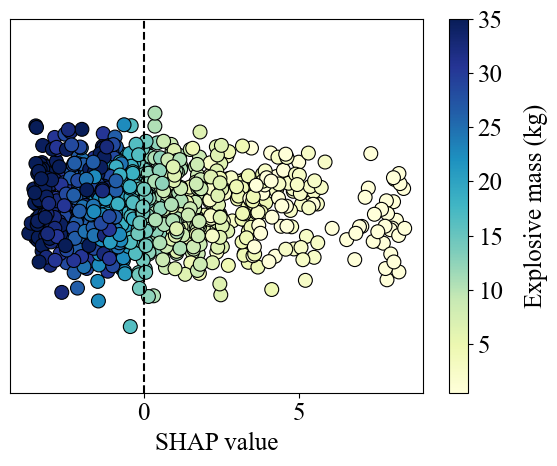

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 18 

selected_shap_values = shap_values[0]

# Assuming shap_values2 is the SHAP values array and X_train is the NumPy array
feature_idx = 0  # Index of the feature you want to visualize

# Extract the SHAP values and feature values for the specific feature
feature_shap_values = selected_shap_values[:, feature_idx]  # SHAP values for the feature
feature_values = X_train[:, feature_idx]  # Feature values

# Set up the plot
plt.figure(figsize=(6, 5))

# Create a jitter for y-values to better visualize overlapping points
y_random_jitter = np.random.normal(loc=0, scale=0.1, size=feature_shap_values.size)

# Set y-axis limits
plt.ylim(-0.6, 0.6) 

# Plot the scatter plot with color mapping based on feature values
sns.scatterplot(
    x=feature_shap_values, 
    y=y_random_jitter, 
    s=100, 
    hue=feature_values, 
    palette='YlGnBu', 
    edgecolor='black', 
    legend=None, 
    alpha=1
)

# Remove y-ticks
plt.yticks([])

# Create a color bar with a label
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=plt.Normalize(vmin=feature_values.min(), vmax=feature_values.max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Explosive mass (kg)', rotation=90, labelpad=15)
cbar.ax.tick_params(labelsize=18)

# Add a vertical line at the mean SHAP value
mean_val = 0
plt.axvline(mean_val, color='black', linestyle='--')

# Set the title and labels with appropriate font sizes
#plt.title('Superplasticiser %', fontsize=18)
plt.xlabel('SHAP value', fontsize=18)
plt.xticks(fontsize=18)

# Adjust layout for better fit
plt.tight_layout()

plt.savefig('Arrival_ANN4_4.png', dpi=200, bbox_inches='tight')
# Show the plot
plt.show()